# Chapter 15: Classifying data with logistic regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)

    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

# 15.1 Testing a classification function on real data

In [4]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

## 15.1.1 Loading the car data

In [5]:
from car_data import bmws, priuses

In [6]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for prius in priuses:
    all_car_data.append((prius.mileage,prius.price,0))

In [7]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

## 15.1.1 Testing the classification function

In [8]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw: #1
            trues += 1
        else:
            falses += 1 #1
    return trues / (trues + falses)

In [9]:
test_classifier(bmw_finder, all_car_data)

0.59

## 15.1.3 Exercises

### Ex15.1
test_classifier 関数を修正して、真陽性、真陰性、偽陽性、偽陰性の数を表示せよ。

In [10]:
def test_classifier2(classifier, data):
    trues = 0
    falses = 0
    true_positive_count = 0
    true_negative_count = 0
    false_positive_count = 0
    false_negative_count = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw: #1
            trues += 1
            if is_bmw:
                true_positive_count += 1
            else:
                true_negative_count += 1
        else:
            falses += 1 #1
            if is_bmw:
                false_negative_count += 1
            else:
                false_positive_count += 1

    print(f"true_positive_count:{true_positive_count}")
    print(f"true_negative_count:{true_negative_count}")
    print(f"false_positive_count:{false_positive_count}")
    print(f"false_negative_count:{false_negative_count}")

    return trues / (trues + falses)

test_classifier2(bmw_finder, all_car_data)

true_positive_count:18
true_negative_count:100
false_positive_count:0
false_negative_count:82


0.59

### Ex15.2
bmw_finder 関数を修正して性能を向上させる方法を見つけ、修正した関数がtest_classifier関数で59%以上の精度を持つことを確認せよ

In [11]:
def bmw_finder2(mileage,price):
    if price > 18000:
        return 1
    else:
        return 0

test_classifier(bmw_finder2, all_car_data)

0.795

# 15.2 Picturing a decision boundary

## 15.2.1 Picturing the space of cars

In [12]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

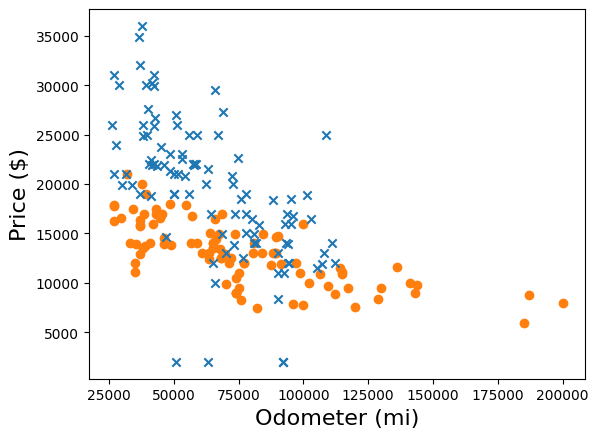

In [13]:
plot_data(all_car_data)

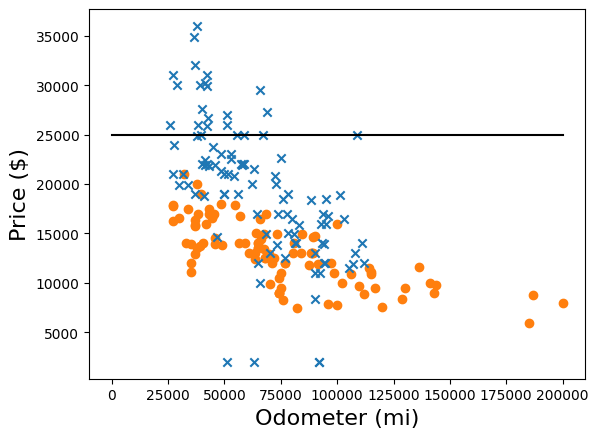

In [14]:
plot_data(all_car_data)
plot_function(lambda x: 25000, 0, 200000, c='k')

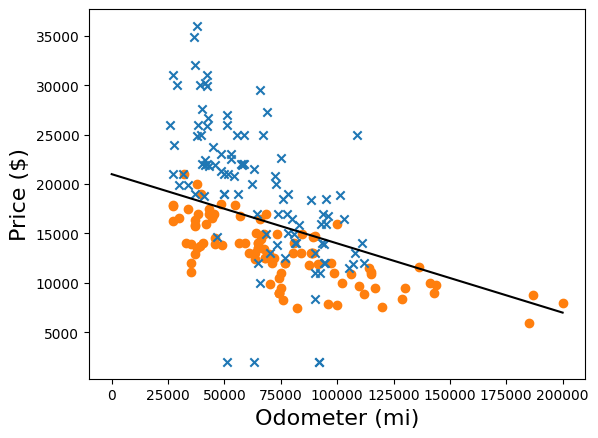

In [15]:
plot_data(all_car_data)
plot_function(lambda x: 21000 - 0.07 * x, 0, 200000, c='k')

## 15.2.3 Implementing the classification function

In [16]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [17]:
test_classifier(decision_boundary_classify, all_car_data)

0.805

## 15.2.4 Exercises

### Ex15.3
このテストデータセットで最良の分類精度を与える p=定数 という形の決定境界を求めよ。

In [18]:
# 分からなかったので答えを見た...

# 15.3 Framing classification as a regression problem


## 15.3.1 Scaling the raw car data

In [19]:
def make_scale(data):
    min_val = min(data) #1
    max_val = max(data)
    def scale(x): #2
        return (x-min_val) / (max_val - min_val)
    def unscale(y): #3
        return y * (max_val - min_val) + min_val
    return scale, unscale #4

price_scale, price_unscale = make_scale([x[1] for x in all_car_data]) #5
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [20]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw)
                    for mileage,price,is_bmw in all_car_data]

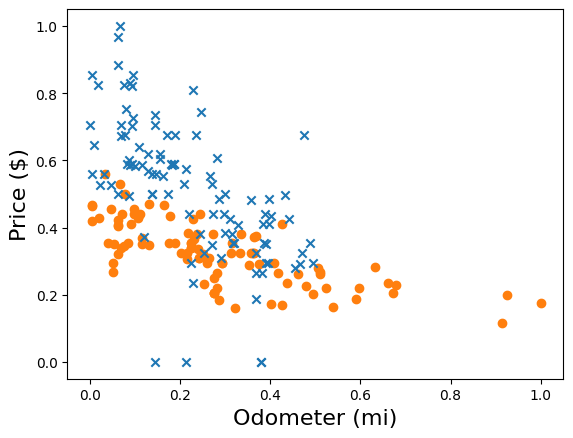

In [21]:
plot_data(scaled_car_data)

## 15.3.2 Measuring BMWness of a car

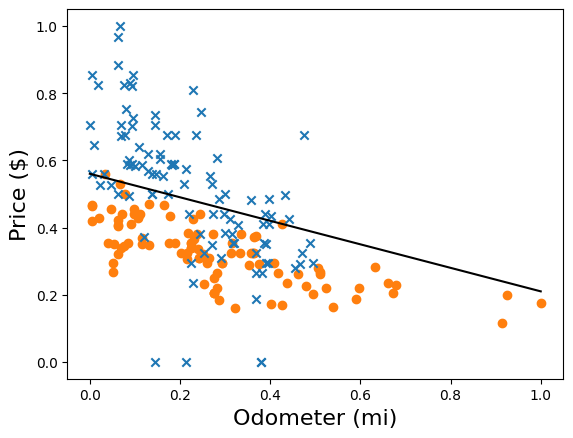

In [22]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56 - 0.35*x,0,1,c='k')

<Figure size 700x700 with 0 Axes>

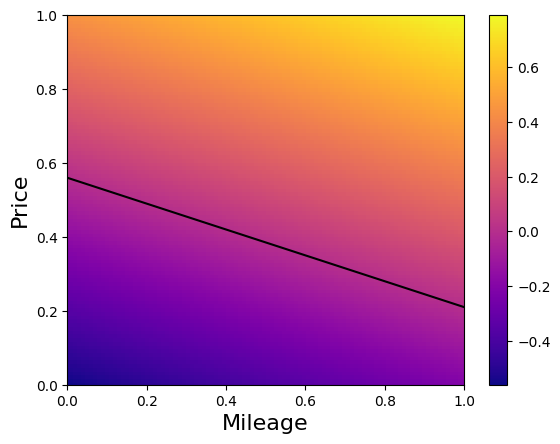

In [23]:
scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

## 15.3.3 Introducing the sigmoid function

In [24]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

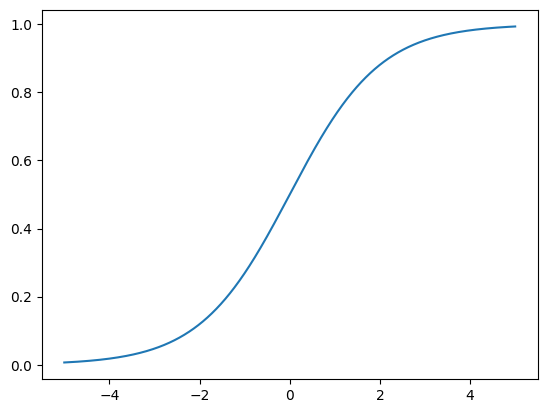

In [25]:
plot_function(sigmoid,-5,5)

## 15.3.4 Composing the sigmoid function with other functions

In [26]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

<Figure size 700x700 with 0 Axes>

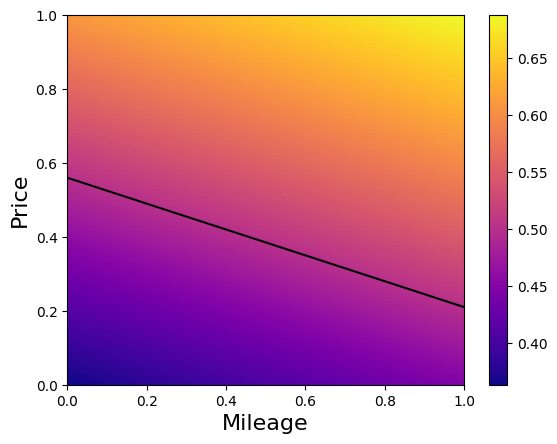

In [27]:
scalar_field_heatmap(l, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

/tmp/ipykernel_1927/673282300.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


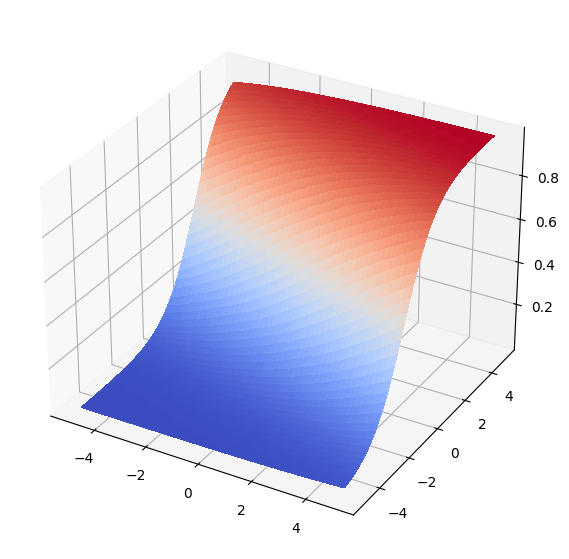

In [28]:
plot_scalar_field(l, -5, 5, -5, 5)

/tmp/ipykernel_1927/673282300.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


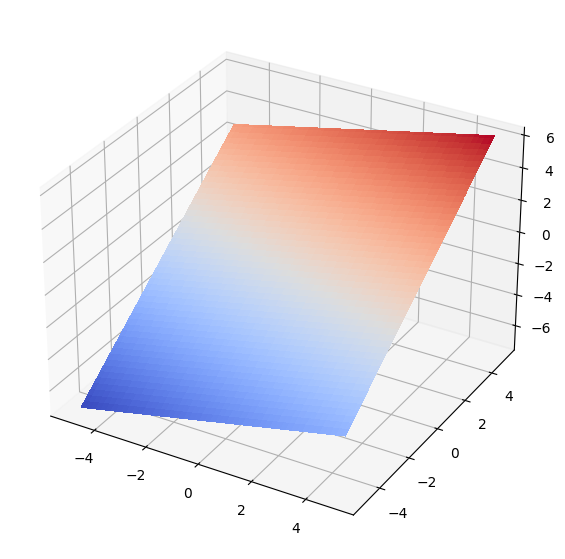

In [29]:
plot_scalar_field(f,-5,5,-5,5)

## 15.3.4 Exercises

### Ex15.4
xの正の値が大きいときは0に近くなり、xの負の値が大きいときは1に近くなり、
h(3)=0.5になるような関数h(x)を求めよ

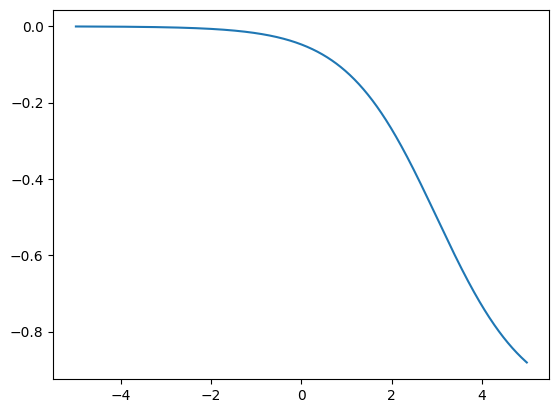

In [30]:
# シグモイドに-1をかけて、+x方向に3移動すれば、問題の関数となる
def sigmoid_converted(x):
    return -1 * sigmoid(x-3)


plot_function(sigmoid_converted,-5,5)


### Ex15.5
実際にはx,pは負の値にならないので、f(x,p)の結果には下限がある。車が作るfの最小値を求めよ。

In [31]:
min_f = 100
min_x = 100
min_p = 100
for x, p, _is_bmw in scaled_car_data:
    if f(x,p) < min_f:
        min_f = f(x,p)
        min_x = x
        min_p = p

print(f"min_x={min_x},min_p={min_p},min_f={min_f}")


min_x=0.14367816091954022,min_p=8.829502310386438e-05,min_f=-0.5096243486550571


# 15.4 Exploring possible logistic functions

## 15.4.1 Parametrizing logistic functions

In [32]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x + b*p - c)
    return l

## 15.4.2 Measuring the quality of fit for a logistic function

In [33]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p))
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

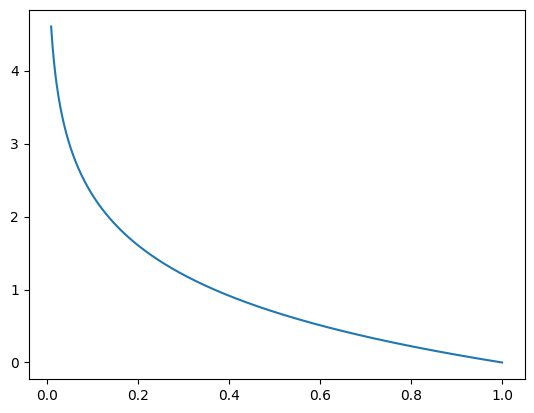

In [34]:
from math import log
plot_function(lambda x: -log(x),0.01,1)

In [35]:
-log(0.01)

4.605170185988091

In [36]:
-log(0.001)

6.907755278982137

In [37]:
def point_cost(l,x,p,is_bmw): #1
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) #2
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

## 15.4.3 Testing different logistic functions

In [38]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff

    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'

    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

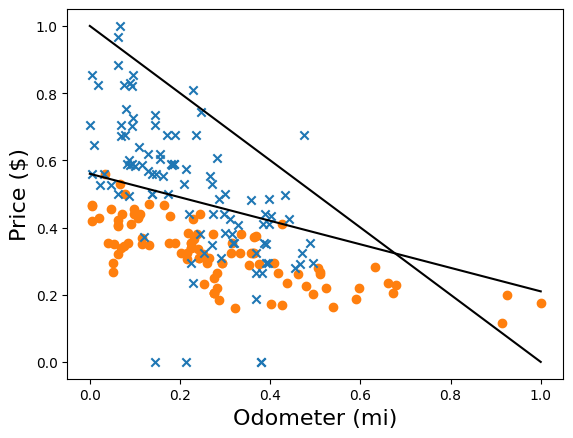

In [39]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56,)
plot_line(1,1,1)

In [40]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [41]:
logistic_cost(1,1,1)

135.56446830870456

## 15.4.4 Exercises

### Ex15.8

/tmp/ipykernel_1927/673282300.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


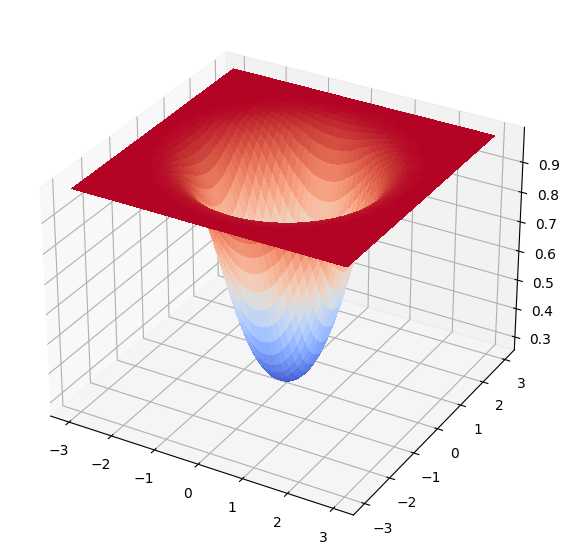

In [42]:
def func_ex15_8(x,y):
    return sigmoid(x**2 + y**2 -1)

plot_scalar_field(func_ex15_8,-3,3,-3,3)

# 15.5 Finding the best logistic function

## 15.5.1 Gradient descent in three dimensions

In [43]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [44]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)

In [45]:
def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

In [46]:
def gradient_descent3(f,xstart,ystart,zstart,
                      tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    return x,y,z

## 15.5.2 Using gradient descent to find the best fit

In [47]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.211144935606108, 5.0454397301259535, 2.126012257002409)

In [48]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

(0.8845715283851627, 6.657543187915828, 2.955057286206768)

To make a cool graph of the decision boundary moving as gradient descent runs:

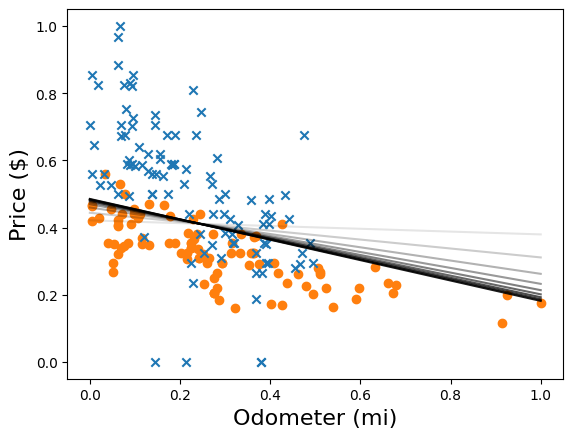

In [49]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')

In [50]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.716700338095373, 11.42206245914627, 5.596878393098621)

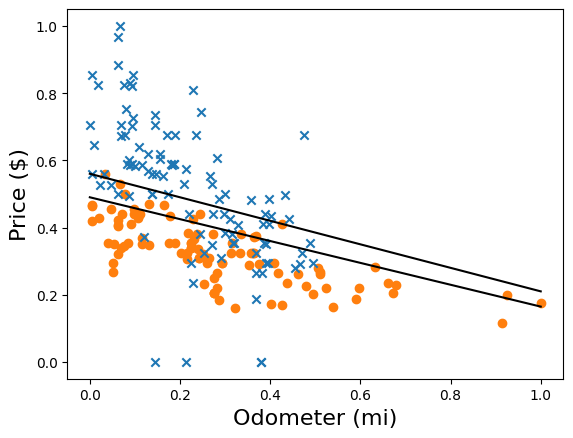

In [51]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919)

## 15.5.3 Testing an understanding the best logistic classifier

In [52]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [53]:
test_classifier(best_logistic_classifier,scaled_car_data)

0.8

/tmp/ipykernel_1927/673282300.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


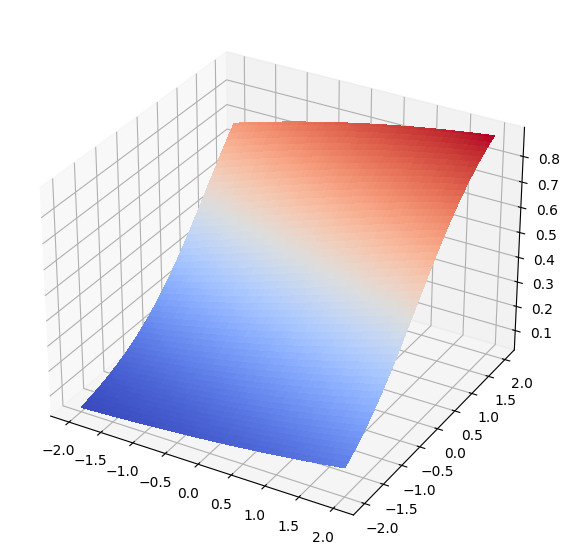

In [54]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)

/tmp/ipykernel_1927/673282300.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


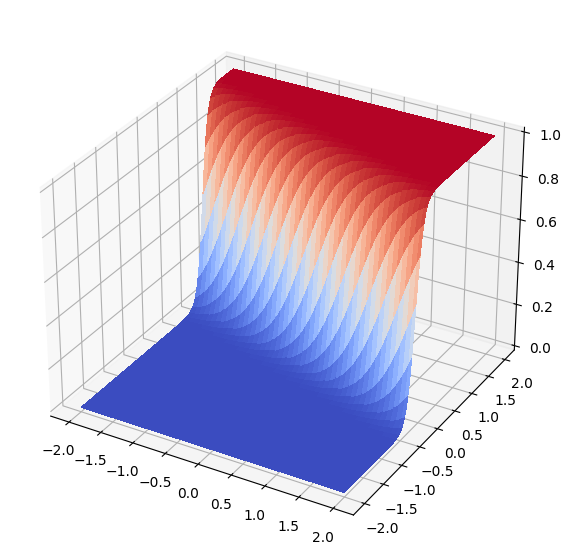

In [55]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

## 15.5.5 Exercises

### Ex15.11
gradient_descent3 関数を修正して、結果を返すまでにかかったステップ数の合計を表示するようにせよ。
logistic_cost の場合、勾配降下法が収束するまでに何ステップかかるか？

In [56]:
def gradient_descent3_with_steps(f,xstart,ystart,zstart,
                      tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print(f"steps={steps}")
    return x,y,z

gradient_descent3_with_steps(logistic_cost,1,1,1,max_steps=8000)

steps=7249


(3.716700338095373, 11.42206245914627, 5.596878393098621)

### Ex15.12
任意の次元数で関数の購買を計算する approx_gradient 関数を書け。次に、任意の次元数で動作する gradient_descent 関数を書け。

In [61]:
# 分からなかったので答えを見た
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg = [(vj if j != i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section, v[i], **kwargs)

def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,v)
    steps=0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,v)
        steps += 1
    return v

# 以下、テスト関数
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])

v = [2,2,2,2,2]
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]

### Ex15.13
コスト関数 simple_logistic_cost を使って勾配降下法を実行してみよ。何が起こるか？

In [57]:
gradient_descent3(simple_logistic_cost,1,1,1,max_steps=8000)

(11.572277808049932, 39.34413640316909, 20.046651460256626)

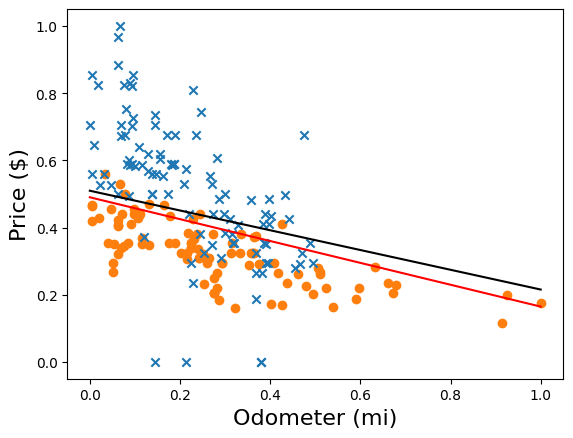

In [60]:
plot_data(scaled_car_data)
# 以下は simple_logistic_cost で導出した答え
plot_line(11.572277808049932, 39.34413640316909, 20.046651460256626)
# 以下は logistic_cost で導出した答え
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919,c='r')